In [3]:
from typing import Annotated, Sequence, TypedDict
from dotenv import load_dotenv  
from langchain_core.messages import BaseMessage # The foundational class for all message types in LangGraph
from langchain_core.messages import ToolMessage # Passes data back to LLM after it calls a tool such as the content and the tool_call_id
from langchain_core.messages import SystemMessage # Message for providing instructions to the LLM
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from IPython.display import Image
load_dotenv()

True

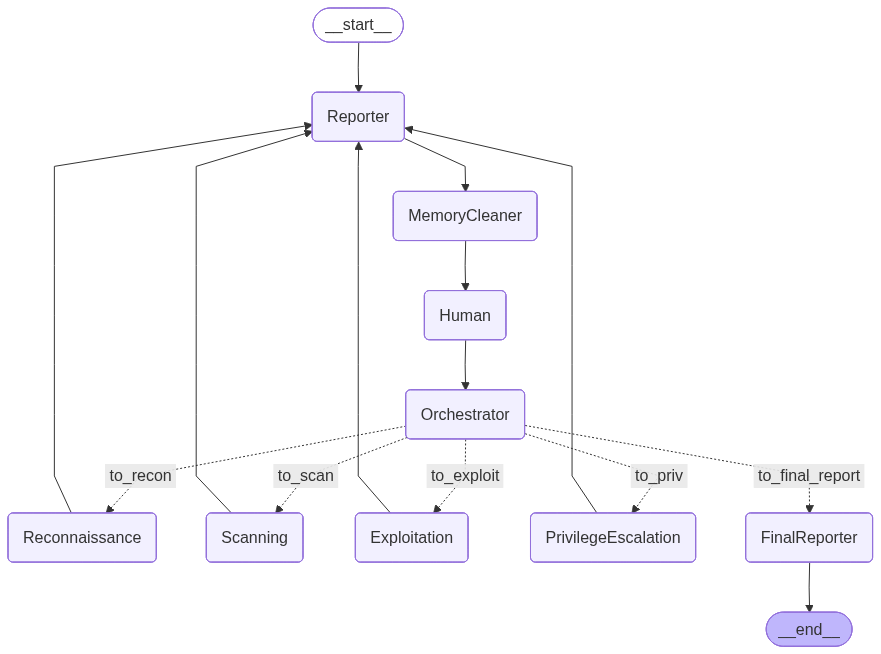

In [ ]:
from typing import Annotated, Sequence, TypedDict
from dotenv import load_dotenv  
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END

load_dotenv()

# --- Stato condiviso ---
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    shared_report: str

# --- Dummy nodes (placeholder) ---
def orchestrator(state: AgentState) -> AgentState:
    return {"messages": ["[Orchestrator] decisione"], "shared_report": state.get("shared_report","")}

def build_recon_agent(state: AgentState) -> AgentState:
    return {"messages": ["[Reconnaissance] scansione"], "shared_report": state.get("shared_report","")}

def scanning_agent(state: AgentState) -> AgentState:
    return {"messages": ["[Scanning] analizzo servizi"], "shared_report": state.get("shared_report","")}

def exploit_agent(state: AgentState) -> AgentState:
    return {"messages": ["[Exploitation] provo exploit"], "shared_report": state.get("shared_report","")}

def priv_esc_agent(state: AgentState) -> AgentState:
    return {"messages": ["[PrivilegeEscalation] provo escalation"], "shared_report": state.get("shared_report","")}

def reporter_agent(state: AgentState) -> AgentState:
    return {"messages": ["[Reporter] aggiorno report"], "shared_report": state.get("shared_report","")}

def final_reporter(state: AgentState) -> AgentState:
    return {"messages": ["[FinalReporter] genero report finale e chiudo"], "shared_report": state.get("shared_report","")}

def memory_cleaner(state: AgentState) -> AgentState:
    return {"messages": ["[MemoryCleaner] pulisco la memoria"], "shared_report": state.get("shared_report","")}

# --- Router placeholder ---
def route_from_orchestrator(state: AgentState) -> str:
    # Finge sempre di mandare a Recon
    return "to_recon"

# --- Costruzione grafo ---
graph = StateGraph(AgentState)

# Nodi
graph.add_node("Orchestrator", orchestrator)
graph.add_node("Reconnaissance", build_recon_agent)
graph.add_node("Scanning", scanning_agent)
graph.add_node("Exploitation", exploit_agent)
graph.add_node("PrivilegeEscalation", priv_esc_agent)
graph.add_node("Reporter", reporter_agent)
graph.add_node("MemoryCleaner", memory_cleaner)
graph.add_node("FinalReporter", final_reporter)

# Entry point
graph.set_entry_point("Reporter")

# Conditional edges dall’orchestrator
graph.add_conditional_edges(
    "Orchestrator",
    route_from_orchestrator,
    {
        "to_recon": "Reconnaissance",
        "to_scan": "Scanning",
        "to_exploit": "Exploitation",
        "to_priv": "PrivilegeEscalation",
        "to_final_report": "FinalReporter",
    },
)

# Tutti gli agenti vanno al reporter
graph.add_edge("Reconnaissance", "Reporter")
graph.add_edge("Scanning", "Reporter")
graph.add_edge("Exploitation", "Reporter")
graph.add_edge("PrivilegeEscalation", "Reporter")

# Reporter torna all’orchestrator
graph.add_edge("Reporter", "MemoryCleaner")
graph.add_edge("MemoryCleaner","Orchestrator")

# FinalReporter chiude tutto
graph.add_edge("FinalReporter", END)

# Compilazione
graph.compile()
